In [1]:
import os
os.getcwd()


'C:\\Users\\swetl'

In [2]:
'''Load and preprocess the dataset,
addressing missing values, and encoding
categorical variables for machine learning
readiness.'''
import numpy as np
import pandas as pd
data= pd.read_csv('Telco_Customer_Churn_Dataset.csv')


In [3]:
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print(data.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
mean_total_charges = data['TotalCharges'].mean()



In [7]:
# Fill missing values with the mean in a non-chained, direct way
data['TotalCharges'] = data['TotalCharges'].fillna(mean_total_charges)

In [8]:
#Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

In [9]:
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [10]:
data['TotalCharges'].dtypes

dtype('float64')

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [12]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994971,0
1,5575-GNVDE,Male,0,No,No,0.066327,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.173876,0
2,3668-QPYBK,Male,0,No,No,-1.236724,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.960399,1
3,7795-CFOCW,Male,0,No,No,0.514251,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.195400,0
4,9237-HQITU,Female,0,No,No,-1.236724,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.941193,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,-0.340876,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.665992,-0.129281,0
7039,2234-XADUH,Female,0,Yes,Yes,1.613701,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1.277533,2.242808,0
7040,4801-JZAZL,Female,0,Yes,Yes,-0.870241,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.168632,-0.855182,0
7041,8361-LTMKD,Male,1,Yes,No,-1.155283,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.320338,-0.872777,1


In [13]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [14]:
'''Divide the data into training (80%) and
testing (20%) sets for model training and
evaluation, ensuring a representative split.'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6607,7242-QZLXF,Male,0,No,Yes,-1.277445,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,-1.311546,-0.996980
2598,8325-QRPZR,Female,0,No,No,-1.033122,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.345265,-0.776347
2345,7874-ECPQJ,Female,0,No,Yes,-1.155283,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),-1.486035,-0.970400
4093,2476-YGEFM,Female,0,No,No,-0.137274,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0.373516,-0.030046
693,2276-YDAVZ,Female,0,No,No,-1.196004,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0.343603,-0.888628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,-1.277445,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.004999,-0.966206
5191,5982-PSMKW,Female,0,Yes,Yes,-0.381597,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0.875378,-0.037530
5226,8044-BGWPI,Male,0,Yes,Yes,-0.829521,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,-1.449476,-0.873020
5390,7450-NWRTR,Male,1,No,No,-0.829521,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.152899,-0.478246


In [16]:
y_train

6607    1
2598    0
2345    0
4093    0
693     1
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5282, dtype: int32

In [17]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [18]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

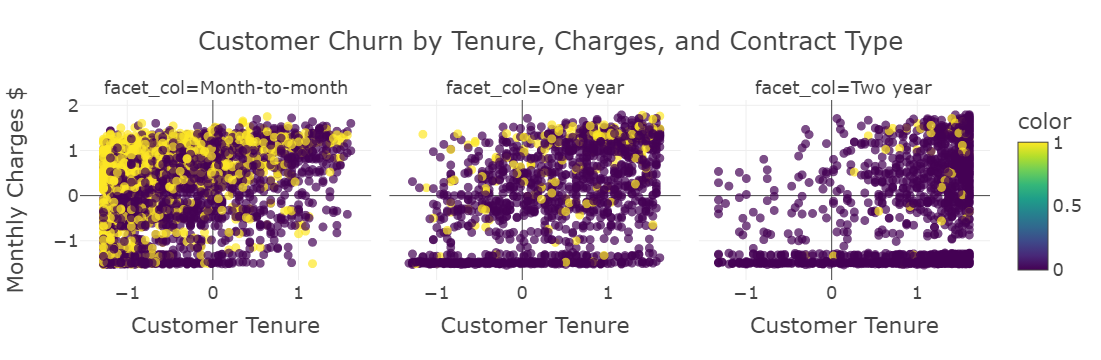

In [35]:
'''Identify and select relevant features
(attributes) influencing churn prediction,
such as contract type, monthly charges,
and tenure.'''
import plotly.express as px

fig = px.scatter(x=data['tenure'], y=data['MonthlyCharges'], 
                 color = data['Churn'], template = 'presentation', 
                 opacity = 0.7, facet_col = data['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Monthly Charges $'})
                
fig.show()

In [30]:
'''Choose a suitable binary classification
algorithm, considering options like logistic
regression, decision trees, random forests, or
gradient boosting.'''

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import itertools

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}
'''Train the selected machine learning model
using the training dataset. Utilize chosen
features as input and "Churn" column as the
target variable.'''

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_encoded, y_train)  # Use encoded data here
y1_pred = LR.predict(X_test_encoded)
print("Logistic Regression")
accuracy = accuracy_score(y_test, y1_pred)


print(f"Accuracy: {accuracy:}")


RF = RandomForestClassifier()
RF.fit(X_train_encoded, y_train)  # Use encoded data here
y2_pred = RF.predict(X_test_encoded)
print("Random Forest")
accuracy = accuracy_score(y_test, y2_pred)


print(f"Accuracy: {accuracy:}")



Logistic Regression
Accuracy: 0.8143100511073254
Random Forest
Accuracy: 0.8001135718341851


In [ ]:
# From the above observation it can be concluded that Logistic Regression performs the best.

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm= confusion_matrix(y_test,y1_pred)
cm

array([[1155,  127],
       [ 200,  279]], dtype=int64)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_test, y1_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1155  127]
 [ 200  279]]


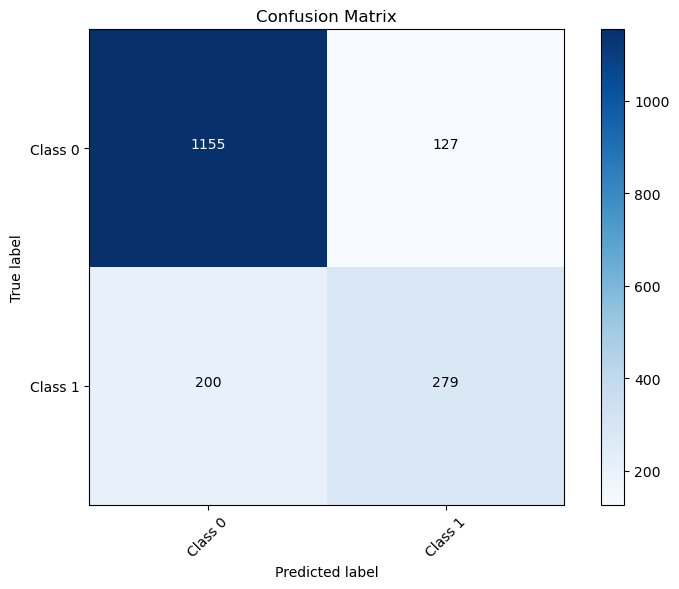

In [28]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)  # Number of classes
plt.xticks(tick_marks, ["Class 0", "Class 1"], rotation=45)
plt.yticks(tick_marks, ["Class 0", "Class 1"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.grid(False)

# Labeling the squares
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

Accuracy: 0.81
Precision: 0.69
Recall: 0.58
F1 Score: 0.63


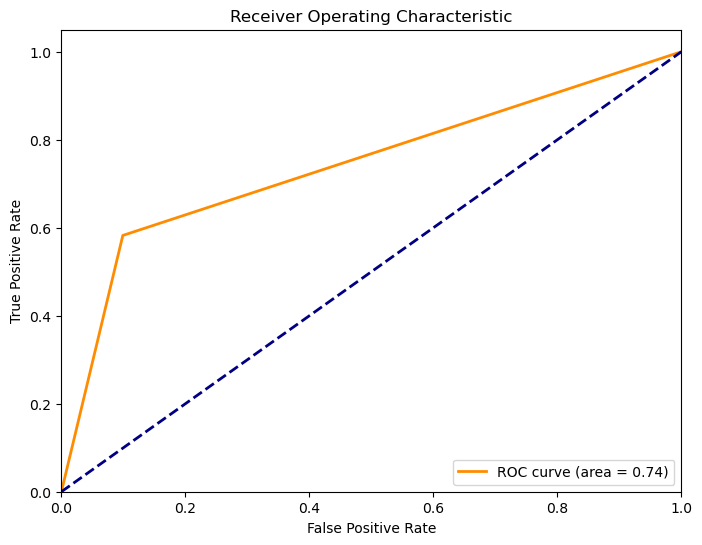

In [29]:
'''Assess the model's performance on the
testing dataset using metrics like accuracy,
precision, recall, F1-score, and ROC-AUC.'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

# Assuming you already have the predictions y_pred and the actual labels y_test

# Calculate various metrics
accuracy = accuracy_score(y_test, y1_pred)
precision = precision_score(y_test, y1_pred, average='binary')  # Modify average as needed
recall = recall_score(y_test, y1_pred, average='binary')  # Modify average as needed
f1 = f1_score(y_test, y1_pred, average='binary')  # Modify average as needed

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, y1_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()